## Stryve Biltong 70 Products Analysis and Visualization 

In [2]:
#libraries
import re
import pandas as pd
import numpy as np
from urllib.request import urlopen
from bs4 import BeautifulSoup as soup
import requests
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#used for not getting blocked
header = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.66 Safari/537.36','Referer':'https://www.amazon.com/'}

In [4]:
url = 'https://www.amazon.com/Stryve-Protein-Biltong-Friendly-Mesquite/dp/B07KX95YC8/ref=sr_1_1_sspa?crid=35NDTVIT2G1RG&dchild=1&keywords=stryve+biltong&qid=1607899620&sprefix=stryve%2Caps%2C195&sr=8-1-spons&psc=1&spLa=ZW5jcnlwdGVkUXVhbGlmaWVyPUEyVVBDUkNCWFFXRzZUJmVuY3J5cHRlZElkPUEwNDI5NjM5MkY0MFZHMlRTRDBVNCZlbmNyeXB0ZWRBZElkPUEwODUyNjM2MkY1QTlKS1dWWjI4NCZ3aWRnZXROYW1lPXNwX2F0ZiZhY3Rpb249Y2xpY2tSZWRpcmVjdCZkb05vdExvZ0NsaWNrPXRydWU='

In [5]:
html = requests.get(url,headers=header)
html

<Response [200]>

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-us"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script>
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link href="https://images-na.ssl-images-amazon.com" rel="dns-prefetch"/>
<link href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link href="https://completion.amazon.com" rel="dns-prefetch"/>
<script type="text/javascript">
window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=function(b){return f()-(b?0:d.ue_t0)};e.stub=function(b,a){if(!b[a]){var c=[];b[a]=function(){c.push([c.slice.call(arguments),e.d(),d.ue_id])};b[a].replay=function(b){for(var a;a=c.shift();)b(a[0],a[1],a
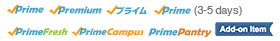
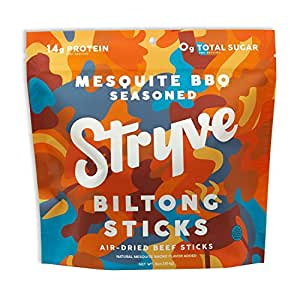

In [6]:
bsobj = soup(html.content,'lxml')
bsobj

In [8]:
bsobj.findAll('div',{'class':'sg-col-4-of-12 s-result-item s-asin sg-col-4-of-16 sg-col sg-col-4-of-20'})

[]

In [ ]:
product_name = bsobj.find('span',{'class':'a-size-large product-title-word-break'}).text.strip()
print(product_name)

In [ ]:
product_price = bsobj.findAll('table',{'class':'a-lineitem'})[0].tr.span.text[1:].replace('$','').strip()
print(product_price)

In [ ]:
product_rating = bsobj.findAll('span',{'class':'a-icon-alt'})[0].text.replace(' out of 5 stars','').replace('Previous page of related Sponsored Products','').strip()
print(product_rating)

In [ ]:
review_count = bsobj.findAll('span',{'id':'acrCustomerReviewText'})[0].text.replace('ratings','').replace('rating','').replace(',','').strip()
print(review_count)

In [ ]:
flavor = bsobj.findAll('td',{'class':'a-span9'})[0].text.strip()
print(flavor)

In [ ]:
brand = bsobj.findAll('td',{'class':'a-span9'})[1].text.strip()
print(brand)

In [ ]:
source_animal = bsobj.findAll('td',{'class':'a-span9'})[2].text.strip()
print(source_animal)

In [ ]:
weight = bsobj.findAll('td',{'class':'a-span9'})[3].text.strip()
print(weight)

In [ ]:
sensitive_ingredient_info = bsobj.findAll('td',{'class':'a-span9'})[4].text.strip()
print(sensitive_ingredient_info)

In [ ]:
#used for any product just change "k and range"
url_list = []
for i in range(1,3):
    url_list.append('https://www.amazon.com/s?k=stryve+biltong&page='+str(i))
url_list

In [1]:
#used for any product just change "search_query"
search_query = 'stryve+biltong'
base_url = 'https://www.amazon.com/s?k='
url = base_url+search_query
url
#url = []
#for i in range(1,3):
 #   url.append('https://www.amazon.com/s?k='+search_query+'&page='+str(i))
#print(url)

'https://www.amazon.com/s?k=stryve+biltong'

In [ ]:
search_response = requests.get(url,headers=header)

In [ ]:
search_response.status_code

In [ ]:
#search_response.text

In [ ]:
#search_response.cookies

In [ ]:
#function
cookie = {}
def getAmazonSearch(search_query):
    for i in range(2,3):
        url = 'https://www.amazon.com/s?k='+search_query+'&page='+str(i)
        print(url)
        #url = BeautifulSoup(response.content)
        page = requests.get(url,headers=header)
        if page.status_code==200:
            return page
        else:
            return 'Error'
        

In [ ]:
#product name
def Searchasin(asin):
    url = 'https://www.amazon.com/dp/'+asin
    print(url)
    page = requests.get(url,cookies=cookie,headers=header)
    if page.status_code==200:
        return page
    else:
        return 'Error'

In [ ]:
#function
def Searchreviews(review_link):
    url = 'https://www.amazon.com'+review_link
    print(url)
    page = requests.get(url,cookies=cookie,headers=header)
    if page.status_code==200:
        return page
    else:
        return 'Error'

In [ ]:
from bs4 import BeautifulSoup
product_names = []
response = getAmazonSearch('stryve+biltong')
soup = BeautifulSoup(response.content)
for i in soup.findAll('span',{'class':'a-size-base-plus a-color-base a-text-normal'}):
    product_names.append(i.text)
#print(product_names)
len(product_names)

In [ ]:
data_asin = []
response = getAmazonSearch('stryve+biltong')
soup = BeautifulSoup(response.content)
for i in soup.findAll('div',{'class':'sg-col-4-of-12 s-result-item s-asin sg-col-4-of-16 sg-col sg-col-4-of-20'}):
    data_asin.append(i['data-asin'])
len(data_asin)
#print(data_asin)

In [ ]:
response.status_code

In [ ]:
link = []
for i in range(len(data_asin)):
    response = Searchasin(data_asin[i])
    soup = BeautifulSoup(response.content)
    for i in soup.findAll('a',{'data-hook':'see-all-reviews-link-foot'}):
        link.append(i['href'])
len(link)

In [ ]:
#reviews, profile name and ratings
reviews = []
profile_name = []
ratings = []
date = []

for j in range(len(link)):
    for k in range(1):
        response = Searchreviews(link[j]+'&pageNumber='+str(k))
        soup = BeautifulSoup(response.content)
        for i in soup.findAll('span',{'data-hook':'review-body'}):
            reviews.append(i.text)
            for l in soup.findAll('span',{'class':'a-profile-name'}):
                profile_name.append(l.text)
                for m in soup.findAll('span',{'class':'a-icon-alt'}):
                    ratings.append(m.text) 
                    for n in soup.findAll('span',{'data-hook':'review-date'}):
                        date.append(n.text)
                        

In [ ]:
print('Number of Reviews:',len(reviews))
print('Number of Names:',len(profile_name))
print('Number of User Ratings:',len(ratings))
print('Number of dates:',len(date))

In [ ]:
#dataframe
rev = {'reviews':reviews,'name':profile_name,'user_ratings':ratings,'date':date}
review_data = pd.DataFrame.from_dict(rev, orient='index')
review_data = review_data.transpose()
pd.set_option('max_colwidth',800)

In [ ]:
review_data.head()

In [ ]:
review_data.to_csv('ankit1.csv',index=False,header=True)

In [ ]:
for i in data_asin:
    url1 = 'https://www.amazon.com/dp/'+str(i)
    html1 = requests.get(url1,headers=header)

In [ ]:
html1

In [ ]:
from bs4 import BeautifulSoup as soup
bsobj1 = soup(html1.content,'lxml')

In [ ]:
url_list1 = []
for i in data_asin:
    url_list1.append('https://www.amazon.com/dp/'+str(i))
len(url_list1)

In [ ]:
final_list = []
for i in range(len(data_asin)):
    response = Searchasin(data_asin[i])
    soup = BeautifulSoup(response.content)
    product_name = soup.find('span',{'class':'a-size-large product-title-word-break'}).text.strip()
    try:
        product_rating = soup.findAll('span',{'class':'a-icon-alt'})[0].text.replace(' out of 5 stars','').replace('Previous page of related Sponsored Products','').strip()
    except AttributeError:
        product_rating = ''
    except IndexError:
        product_rating = ''
    try:
        product_price = soup.findAll('table',{'class':'a-lineitem'})[0].tr.span.text[1:].replace('$','').strip()
    except AttributeError:
        product_price = ''
    except IndexError:
        product_price = ''
    try:
        review_count = soup.findAll('span',{'id':'acrCustomerReviewText'})[0].text.replace('ratings','').replace('rating','').strip()
    except AttributeError:
        review_count = ''
    except IndexError:
        review_count = ''
    try:
        flavor = soup.findAll('td',{'class':'a-span9'})[0].text.strip()
        if flavor == None:
            flavor.append('')
    except AttributeError:
        flavor = ''
    except IndexError:
        flavor = ''
    try:
        brand = soup.findAll('td',{'class':'a-span9'})[1].text.strip()
        if brand == None:
            brand.append('')
    except AttributeError:
        brand = ''
    except IndexError:
        brand = ''
    try:
        source_animal = soup.findAll('td',{'class':'a-span9'})[2].text.strip()
        if source_animal == None:
            source_animal.append('')
    except AttributeError:
        source_animal = ''
    except IndexError:
        source_animal = ''
    try:
        weight = soup.findAll('td',{'class':'a-span9'})[3].text.strip()
        if weight == None:
            weight.append('')
    except AttributeError:
        weight = ''
    except IndexError:
        weight = ''
    try:
        sensitive_ingredient_info = soup.findAll('td',{'class':'a-span9'})[4].text.strip()
        if sensitive_ingredient_info == None:
            sensitive_ingredient_info.append('')
    except AttributeError:
        sensitive_ingredient_info = ''
    except IndexError:
        sensitive_ingredient_info = ''
    
    
    final=[product_name,product_rating,product_price,review_count,flavor,brand,source_animal,weight,sensitive_ingredient_info]
    final_list.append(final)


In [ ]:
df = pd.DataFrame(final_list,columns=['name','rating','price','review','flavor','brand','source_type','weight','sensitive_info']) 

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df.to_csv('ankit4.csv',index=False,header=True)

In [ ]:
df1 = pd.read_csv('C:/Users/ANKIT/Desktop/ankit1.csv')
len(df1)

In [ ]:
df2 = pd.read_csv('C:/Users/ANKIT/Desktop/ankit2.csv')
len(df2)

In [ ]:
df3 = pd.read_csv('C:/Users/ANKIT/Desktop/ankit3.csv')
len(df3)

In [ ]:
df4 = pd.read_csv('C:/Users/ANKIT/Desktop/ankit4.csv')
len(df4)

In [ ]:
df5 = df1.append(df2,ignore_index=False)

In [ ]:
df5.to_csv('ankit5.csv',index=False,header=True)

In [ ]:
df = pd.read_csv('C:/Users/ANKIT/Desktop/ankit5.csv')

In [ ]:
df6 = df3.append(df4,ignore_index=False)

In [ ]:
df6.to_csv('ankit6.csv',index=False,header=True)

In [65]:
df1 = pd.read_csv('C:/Users/ANKIT/Desktop/ankit6.csv')

In [66]:
len(df1)

71

In [67]:
df1.isnull().sum()

name               0
rating            11
price              8
review            11
flavor            10
brand             10
source_type       10
weight            15
sensitive_info    23
dtype: int64

In [68]:
df1.drop(['source_type','weight','sensitive_info','brand','flavor'],axis=1,inplace=True)

In [69]:
df1 = df1.reset_index(drop=True)

In [70]:
df1['review'] = pd.to_numeric(df1.review, errors='coerce')

In [71]:
df1.dtypes

name       object
rating    float64
price     float64
review    float64
dtype: object

In [72]:
df1.price.mean()

20.832857142857154

In [73]:
df1.price.median()

19.69

In [74]:
#filling na values of price by mean
df1['price'] = df1['price'].fillna(df1['price'].mean())

In [75]:
df1.isnull().sum()

name       0
rating    11
price      0
review    22
dtype: int64

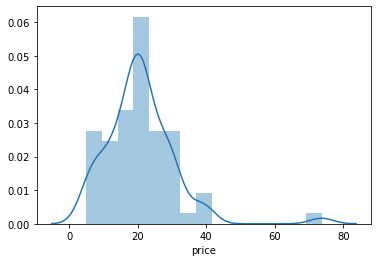

In [76]:
sns.distplot(df1.price)

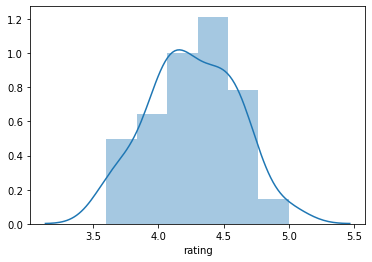

In [77]:
sns.distplot(df1.rating)

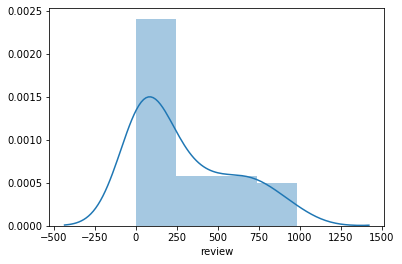

In [78]:
sns.distplot(df1.review)

In [79]:
df1.corr()

,rating,price,review
rating,1.000000,-0.180433,0.154052
price,-0.180433,1.000000,-0.099937
review,0.154052,-0.099937,1.000000


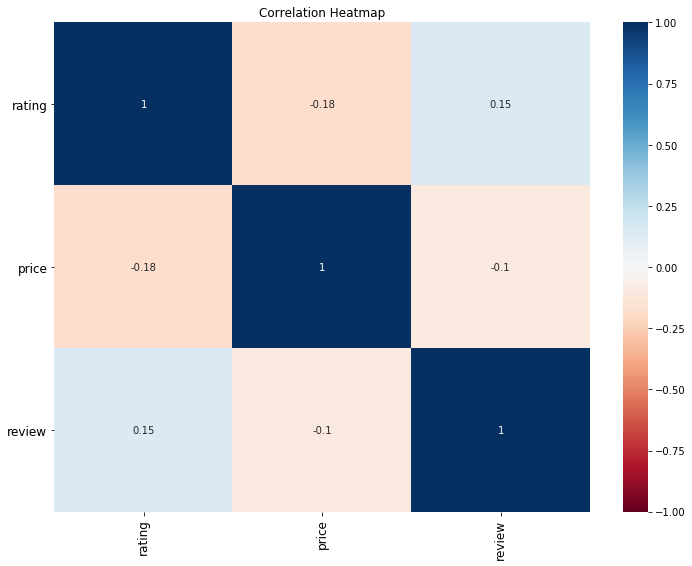

In [80]:
#heatmap relation between attributes
plt.figure(figsize=(12,9))
s = sns.heatmap(df1.corr(),
               annot = True,
               cmap = 'RdBu',
               vmin = -1,
               vmax = 1)
s.set_yticklabels(s.get_yticklabels(),rotation=0,fontsize=12)
s.set_xticklabels(s.get_xticklabels(),rotation=90,fontsize=12)
plt.title('Correlation Heatmap')
plt.show()

In [81]:
df1.head()

,name,rating,price,review
0,Stryve Protein Snacks Beef Sticks. 14g Protein...,4.2,38.99,31.0
1,"Stryve Mini Snack Beef Sticks. 14g Protein, Su...",3.7,24.99,508.0
2,"Stryve Biltong, Beef Jerky without the Junky. ...",3.8,22.79,156.0
3,Stryve Protein Snacks Beef Sticks. 14g Protein...,4.2,19.99,64.0
4,Stryve Protein Snack | Air Dried 100% Beef Bil...,4.1,10.99,220.0


In [82]:
# Extract product size
df1['size'] = [re.split("; |, |\*|\n", p)
for p in df1['name']]

In [83]:
df1['brand'] = [" ".join(p.replace(',',' ').split()[0:2]) for p in df1['name']]

In [84]:
df1['brand'].unique()

array(['Stryve Protein', 'Stryve Mini', 'Stryve Biltong', 'Stryve Beef',
       'Braaitime -', 'Braaitime Biltong', 'Righteous Felon',
       'Ayoba Spicy', 'Stryve Original', 'Brooklyn Biltong',
       'Variety Pack', 'Boikeys Biltong', 'Ayoba Biltong',
       'Bledie Lekker', 'Original Kalahari', "Jack Link's", 'Jack Link’s',
       "People's Choice", 'Original Beef', 'Baja Beef', 'Droewors -',
       'The Grub', 'Jack Links', 'SimpliMEAT Original',
       'Lorissa’s Kitchen', 'Stryve 0g', 'Tillamook Country',
       'Stryve Gourmet', 'Stryve Foods', "Cattleman's Cut",
       'Jacques Biltong', 'KETO CARNE', 'Simms Protein'], dtype=object)

In [85]:
def replaceBrands(string):
    # specific
    string = re.sub(r"Stryve Protein", "Stryve", string)
    string = re.sub(r"Stryve Mini", "Stryve", string)
    string = re.sub(r"Stryve Biltong", "Stryve", string)
    string = re.sub(r"Stryve Beef", "Stryve", string)
    string = re.sub(r"Braaitime -", "Braaitime", string)
    string = re.sub(r"Braaitime Biltong", "Braaitime", string)
    string = re.sub(r"Righteous Felon", "", string) 
    string = re.sub(r"Variety Pack", "Kalahari", string) 
    string = re.sub(r"Boikeys Biltong", "Boikeys", string) 
    string = re.sub(r"Ayoba Biltong", "Ayoba", string) 
    string = re.sub(r"Original Kalahari", "Kalahari", string) 
    string = re.sub(r"Jack Link's", "Jack Links", string) 
    string = re.sub(r"Original Beef", "Country Archer", string) 
    string = re.sub(r"Droewors -", "No Brand", string) 
    string = re.sub(r"SimpliMEAT Original", "SimpliMEAT", string) 
    string = re.sub(r"Stryve 0g", "Stryve", string) 
    string = re.sub(r"Tillamook Country", "Tillamook", string) 
    string = re.sub(r"Stryve Gourmet", "Stryve", string) 
    string = re.sub(r"Stryve Foods", "Stryve", string) 
    string = re.sub(r"Jacques Biltong", "Jacques", string) 
    string = re.sub(r"KETO CARNE", "Keto Carne", string) 
    string = re.sub(r"Simms Protein", "FCV", string) 
    string = re.sub(r"Jack Link’s", "Jack Links", string) 
    

    return string

# standardize common brand names
df1['brand'] = [replaceBrands(s) for s in df1['brand']]


In [86]:
len(df1['brand'].unique())

23

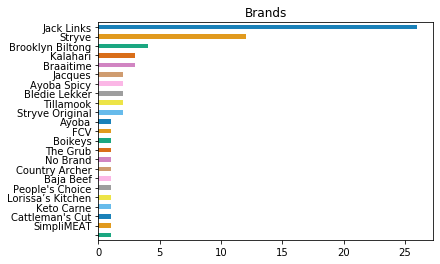

In [87]:
#brand value counts
df1.brand.value_counts().plot(kind='barh', alpha=.9, color=sns.color_palette("colorblind"), title='Brands').invert_yaxis()

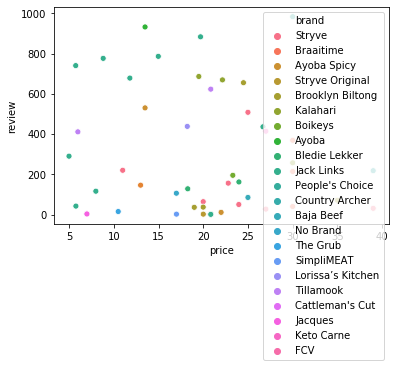

In [88]:
sns.scatterplot(data=df1, x="price", y="review", hue="brand")

Text(0.5, 1.0, 'Sum of Reviews Vs Brand Name')

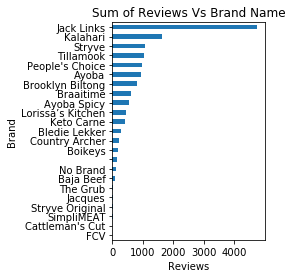

In [89]:
#plot sum of reviews vs brand name
ax1=plt.subplot(121)
df1.groupby(['brand'], as_index=False).agg({'review': 'sum'}).sort_values('review').plot.barh(x='brand',legend=False, ax=ax1)

ax1.set_xlabel('Reviews')
ax1.set_ylabel('Brand')
ax1.set_title('Sum of Reviews Vs Brand Name')

Text(0.5, 1.0, 'Price Mean Vs Brand Name')

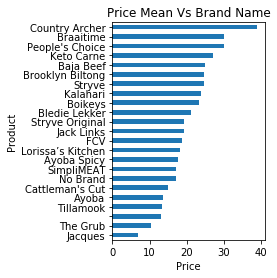

In [90]:
#plot price vs brand
ax1=plt.subplot(121)
df1.groupby(['brand'], as_index=False).agg({'price': 'mean'}).sort_values('price').plot.barh(x='brand',legend=False, ax=ax1)
ax1.set_xlabel('Price')
ax1.set_ylabel('Product')
ax1.set_title('Price Mean Vs Brand Name')

Text(0.5, 1.0, 'Reviews Vs Brand Name')

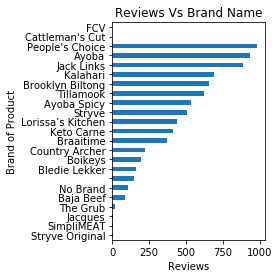

In [91]:
#plot reviews vs brand name
ax1=plt.subplot(121)
df1.groupby(['brand'], as_index=False).agg({'review': 'max'}).sort_values('review').plot.barh(x='brand',legend=False, ax=ax1)
ax1.set_xlabel('Reviews')
ax1.set_ylabel('Brand of Product')
ax1.set_title('Reviews Vs Brand Name')

In [92]:
df2 = pd.read_csv('C:/Users/ANKIT/Desktop/ankit5.csv')

C:\Users\ANKIT\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning:

Columns (0,1,2) have mixed types.Specify dtype option on import or set low_memory=False.



In [93]:
df2.head()

,reviews,name,user_ratings,date
0,\n\n The pictures should speak for themselves...,oldman042,4.1 out of 5 stars,"Reviewed in the United States on September 18,..."
1,\n\n I was excited to find this product. A lo...,Tracy J,4.0 out of 5 stars,"Reviewed in the United States on June 16, 2019"
2,\n\n The Zest Garlic package from the variety...,Tracy J,1.0 out of 5 stars,"Reviewed in the United States on December 27, ..."
3,\n\n I'm always looking for ways to supplemen...,James G,1.0 out of 5 stars,"Reviewed in the United States on February 18, ..."
4,\n\n i read an article about a new kind of me...,Lucky's Morgue,2.0 out of 5 stars,"Reviewed in the United States on April 19, 2019"


In [94]:
df2.tail()

,reviews,name,user_ratings,date
789295,NaN,NaN,NaN,"Reviewed in the United States on March 24, 2020"
789296,NaN,NaN,NaN,"Reviewed in the United States on February 7, 2020"
789297,NaN,NaN,NaN,"Reviewed in the United States on October 19, 2020"
789298,NaN,NaN,NaN,"Reviewed in the United States on December 5, 2020"
789299,NaN,NaN,NaN,"Reviewed in the United States on December 5, 2020"


In [95]:
#dropping duplicates
df2.drop_duplicates(inplace = True)

In [96]:
df2.dtypes

reviews         object
name            object
user_ratings    object
date            object
dtype: object

In [97]:
#checking word count
df2['word_count'] = df2['reviews'].apply(lambda x: len(str(x).split(" ")))

In [98]:
df2 = df2.reset_index(drop=True)

In [99]:
df2.head()

,reviews,name,user_ratings,date,word_count
0,\n\n The pictures should speak for themselves...,oldman042,4.1 out of 5 stars,"Reviewed in the United States on September 18,...",39
1,\n\n I was excited to find this product. A lo...,Tracy J,4.0 out of 5 stars,"Reviewed in the United States on June 16, 2019",150
2,\n\n The Zest Garlic package from the variety...,Tracy J,1.0 out of 5 stars,"Reviewed in the United States on December 27, ...",172
3,\n\n I'm always looking for ways to supplemen...,James G,1.0 out of 5 stars,"Reviewed in the United States on February 18, ...",138
4,\n\n i read an article about a new kind of me...,Lucky's Morgue,2.0 out of 5 stars,"Reviewed in the United States on April 19, 2019",245


In [100]:
df2.tail()

,reviews,name,user_ratings,date,word_count
5661,NaN,NaN,NaN,"Reviewed in the United States on August 24, 2017",1
5662,NaN,NaN,NaN,"Reviewed in the United States on August 20, 2020",1
5663,NaN,NaN,NaN,"Reviewed in the United States on March 29, 2018",1
5664,NaN,NaN,NaN,"Reviewed in the United States on February 7, 2020",1
5665,NaN,NaN,NaN,"Reviewed in the United States on October 19, 2020",1


In [101]:
#dropping nan values
df2.dropna(inplace=True)

In [102]:
df2.isnull().sum()

reviews         0
name            0
user_ratings    0
date            0
word_count      0
dtype: int64

In [103]:
df2.head()

,reviews,name,user_ratings,date,word_count
0,\n\n The pictures should speak for themselves...,oldman042,4.1 out of 5 stars,"Reviewed in the United States on September 18,...",39
1,\n\n I was excited to find this product. A lo...,Tracy J,4.0 out of 5 stars,"Reviewed in the United States on June 16, 2019",150
2,\n\n The Zest Garlic package from the variety...,Tracy J,1.0 out of 5 stars,"Reviewed in the United States on December 27, ...",172
3,\n\n I'm always looking for ways to supplemen...,James G,1.0 out of 5 stars,"Reviewed in the United States on February 18, ...",138
4,\n\n i read an article about a new kind of me...,Lucky's Morgue,2.0 out of 5 stars,"Reviewed in the United States on April 19, 2019",245


In [104]:
df2.tail()

,reviews,name,user_ratings,date,word_count
4498,\n\n I ride a bicycle and I have a hard time ...,J.,3.0 out of 5 stars,"Reviewed in the United States on April 3, 2020",90
4499,"\n\n I prefer Whole Foods 365 Turkey Jerky, b...",James C Young,5.0 out of 5 stars,"Reviewed in the United States on April 17, 2020",59
4500,\n\n I have ordered this before and was very ...,Uncle Genie,4.0 out of 5 stars,"Reviewed in the United States on May 18, 2019",36
4501,\n\n Flavor was pretty good. My dog knows whe...,James C Young,4.0 out of 5 stars,"Reviewed in the United States on April 25, 2019",59
4502,\n\n Will purchase again\n\n,Uncle Genie,3.0 out of 5 stars,"Reviewed in the United States on June 6, 2019",5


In [105]:
#user ratings cleaning
def star_clean(df_col):
    new_column = []
    for i in df_col.map(lambda x: x.replace('out of 5 stars', '')):
        x = np.array(i, dtype= object)
        new_column.append(x) 
    return new_column

In [106]:
df2.user_ratings = star_clean(df2.user_ratings)

In [107]:
#cleaning reviews
df2['lowercase'] = df2['reviews'].apply(lambda x: " ".join(word.lower() for word in x.split()))
df2.head()

,reviews,name,user_ratings,date,word_count,lowercase
0,\n\n The pictures should speak for themselves...,oldman042,4.1,"Reviewed in the United States on September 18,...",39,the pictures should speak for themselves. inte...
1,\n\n I was excited to find this product. A lo...,Tracy J,4.0,"Reviewed in the United States on June 16, 2019",150,i was excited to find this product. a local je...
2,\n\n The Zest Garlic package from the variety...,Tracy J,1.0,"Reviewed in the United States on December 27, ...",172,the zest garlic package from the variety pack ...
3,\n\n I'm always looking for ways to supplemen...,James G,1.0,"Reviewed in the United States on February 18, ...",138,i'm always looking for ways to supplement my d...
4,\n\n i read an article about a new kind of me...,Lucky's Morgue,2.0,"Reviewed in the United States on April 19, 2019",245,i read an article about a new kind of meat sna...


In [108]:
#cleaning reviews
df2['punctuation'] = df2['lowercase'].str.replace('[^\w\s]','')
df2.head()

,reviews,name,user_ratings,date,word_count,lowercase,punctuation
0,\n\n The pictures should speak for themselves...,oldman042,4.1,"Reviewed in the United States on September 18,...",39,the pictures should speak for themselves. inte...,the pictures should speak for themselves inten...
1,\n\n I was excited to find this product. A lo...,Tracy J,4.0,"Reviewed in the United States on June 16, 2019",150,i was excited to find this product. a local je...,i was excited to find this product a local jer...
2,\n\n The Zest Garlic package from the variety...,Tracy J,1.0,"Reviewed in the United States on December 27, ...",172,the zest garlic package from the variety pack ...,the zest garlic package from the variety pack ...
3,\n\n I'm always looking for ways to supplemen...,James G,1.0,"Reviewed in the United States on February 18, ...",138,i'm always looking for ways to supplement my d...,im always looking for ways to supplement my di...
4,\n\n i read an article about a new kind of me...,Lucky's Morgue,2.0,"Reviewed in the United States on April 19, 2019",245,i read an article about a new kind of meat sna...,i read an article about a new kind of meat sna...


In [109]:
#nltk contains 179 stopwords we can add any extra stopwords if we feel
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
len(stop_words)

179

In [110]:
#cleaning reviews
df2['clean'] = df2['punctuation'].apply(lambda x: " ".join(word for word in x.split() if word not in stop_words))
df2.head()

,reviews,name,user_ratings,date,word_count,lowercase,punctuation,clean
0,\n\n The pictures should speak for themselves...,oldman042,4.1,"Reviewed in the United States on September 18,...",39,the pictures should speak for themselves. inte...,the pictures should speak for themselves inten...,pictures speak intense mold everywhere idea ze...
1,\n\n I was excited to find this product. A lo...,Tracy J,4.0,"Reviewed in the United States on June 16, 2019",150,i was excited to find this product. a local je...,i was excited to find this product a local jer...,excited find product local jerkey place used c...
2,\n\n The Zest Garlic package from the variety...,Tracy J,1.0,"Reviewed in the United States on December 27, ...",172,the zest garlic package from the variety pack ...,the zest garlic package from the variety pack ...,zest garlic package variety pack sits unopened...
3,\n\n I'm always looking for ways to supplemen...,James G,1.0,"Reviewed in the United States on February 18, ...",138,i'm always looking for ways to supplement my d...,im always looking for ways to supplement my di...,im always looking ways supplement diet protein...
4,\n\n i read an article about a new kind of me...,Lucky's Morgue,2.0,"Reviewed in the United States on April 19, 2019",245,i read an article about a new kind of meat sna...,i read an article about a new kind of meat sna...,read article new kind meat snack called bilton...


In [111]:
df2['geography'] = 'US'

In [112]:
df2.head()

,reviews,name,user_ratings,date,word_count,lowercase,punctuation,clean,geography
0,\n\n The pictures should speak for themselves...,oldman042,4.1,"Reviewed in the United States on September 18,...",39,the pictures should speak for themselves. inte...,the pictures should speak for themselves inten...,pictures speak intense mold everywhere idea ze...,US
1,\n\n I was excited to find this product. A lo...,Tracy J,4.0,"Reviewed in the United States on June 16, 2019",150,i was excited to find this product. a local je...,i was excited to find this product a local jer...,excited find product local jerkey place used c...,US
2,\n\n The Zest Garlic package from the variety...,Tracy J,1.0,"Reviewed in the United States on December 27, ...",172,the zest garlic package from the variety pack ...,the zest garlic package from the variety pack ...,zest garlic package variety pack sits unopened...,US
3,\n\n I'm always looking for ways to supplemen...,James G,1.0,"Reviewed in the United States on February 18, ...",138,i'm always looking for ways to supplement my d...,im always looking for ways to supplement my di...,im always looking ways supplement diet protein...,US
4,\n\n i read an article about a new kind of me...,Lucky's Morgue,2.0,"Reviewed in the United States on April 19, 2019",245,i read an article about a new kind of meat sna...,i read an article about a new kind of meat sna...,read article new kind meat snack called bilton...,US


In [113]:
def date_conv(d):
    d = str(d)
    x = re.search("on", d)
    d = d[int(x.end()+1):]
    return d

In [114]:
df2['date'] = df2['date'].apply(date_conv)

In [115]:
df2.dtypes

reviews         object
name            object
user_ratings    object
date            object
word_count       int64
lowercase       object
punctuation     object
clean           object
geography       object
dtype: object

In [116]:
df2.head()

,reviews,name,user_ratings,date,word_count,lowercase,punctuation,clean,geography
0,\n\n The pictures should speak for themselves...,oldman042,4.1,"September 18, 2019",39,the pictures should speak for themselves. inte...,the pictures should speak for themselves inten...,pictures speak intense mold everywhere idea ze...,US
1,\n\n I was excited to find this product. A lo...,Tracy J,4.0,"June 16, 2019",150,i was excited to find this product. a local je...,i was excited to find this product a local jer...,excited find product local jerkey place used c...,US
2,\n\n The Zest Garlic package from the variety...,Tracy J,1.0,"December 27, 2019",172,the zest garlic package from the variety pack ...,the zest garlic package from the variety pack ...,zest garlic package variety pack sits unopened...,US
3,\n\n I'm always looking for ways to supplemen...,James G,1.0,"February 18, 2019",138,i'm always looking for ways to supplement my d...,im always looking for ways to supplement my di...,im always looking ways supplement diet protein...,US
4,\n\n i read an article about a new kind of me...,Lucky's Morgue,2.0,"April 19, 2019",245,i read an article about a new kind of meat sna...,i read an article about a new kind of meat sna...,read article new kind meat snack called bilton...,US


In [117]:
df2.tail()

,reviews,name,user_ratings,date,word_count,lowercase,punctuation,clean,geography
4498,\n\n I ride a bicycle and I have a hard time ...,J.,3.0,"April 3, 2020",90,i ride a bicycle and i have a hard time findin...,i ride a bicycle and i have a hard time findin...,ride bicycle hard time finding lean protein wi...,US
4499,"\n\n I prefer Whole Foods 365 Turkey Jerky, b...",James C Young,5.0,"April 17, 2020",59,"i prefer whole foods 365 turkey jerky, but tho...",i prefer whole foods 365 turkey jerky but thou...,prefer whole foods 365 turkey jerky thought wo...,US
4500,\n\n I have ordered this before and was very ...,Uncle Genie,4.0,"May 18, 2019",36,i have ordered this before and was very satisf...,i have ordered this before and was very satisf...,ordered satisfied however time ordered receive...,US
4501,\n\n Flavor was pretty good. My dog knows whe...,James C Young,4.0,"April 25, 2019",59,flavor was pretty good. my dog knows when i ge...,flavor was pretty good my dog knows when i get...,flavor pretty good dog knows get bag comes box...,US
4502,\n\n Will purchase again\n\n,Uncle Genie,3.0,"June 6, 2019",5,will purchase again,will purchase again,purchase,US


In [118]:
from datetime import datetime
def date_make(a):
    a = datetime.strptime(a, "%B %d, %Y")
    return a

In [119]:
df2['date'] = df2['date'].apply(date_make)

In [120]:
df2.dtypes

reviews                 object
name                    object
user_ratings            object
date            datetime64[ns]
word_count               int64
lowercase               object
punctuation             object
clean                   object
geography               object
dtype: object

In [121]:
df2['user_ratings'] = df2.user_ratings.astype(float)

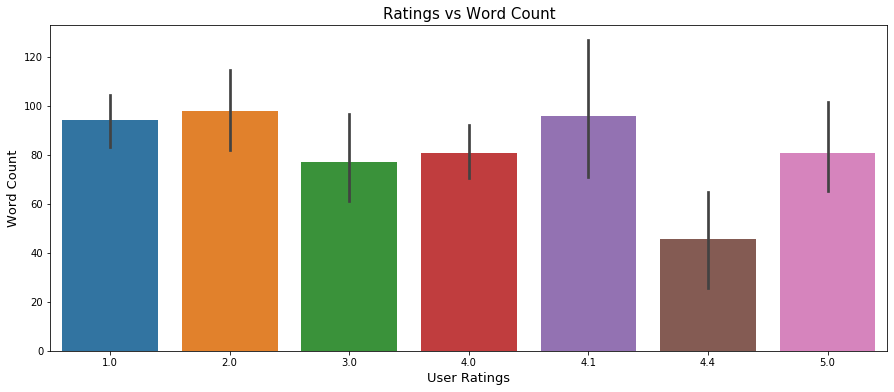

In [122]:
#plot ratings vs word count
plt.figure(figsize=(15,6))
sns.barplot(x='user_ratings', y='word_count', data=df2)
plt.xlabel('User Ratings', fontsize=13)
plt.ylabel('Word Count', fontsize=13)
plt.title('Ratings vs Word Count', fontsize=15)
plt.show();

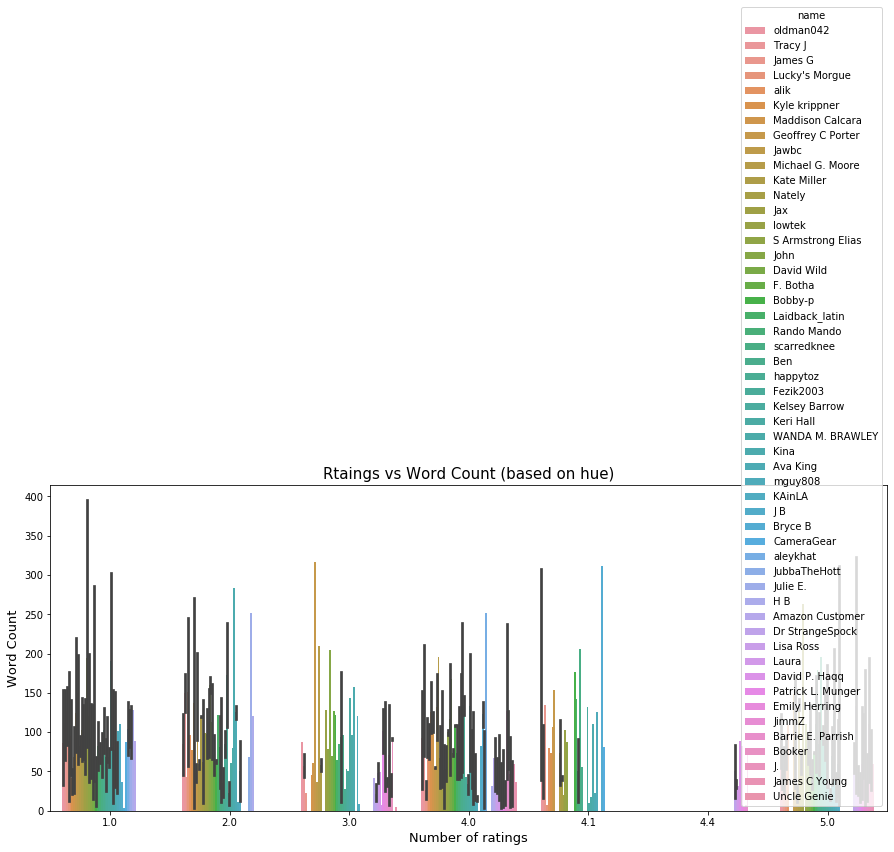

In [123]:
#plot star vs word count based on hue of name
plt.figure(figsize=(15,6))
sns.barplot(x='user_ratings', y='word_count', hue='name', data=df2)
plt.xlabel('Number of ratings', fontsize=13)
plt.ylabel('Word Count', fontsize=13)
plt.title('Rtaings vs Word Count (based on hue)', fontsize=15)
plt.show();

In [124]:
#Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
!pip install -q wordcloud
import wordcloud
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ANKIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ANKIT\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ANKIT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ANKIT\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [125]:
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

In [126]:
from textblob import TextBlob

In [127]:
df2['polarity'] = df2['clean'].apply(pol)
df2['subjectivity'] = df2['clean'].apply(sub)

In [128]:
df2['polarity'] = df2['polarity'].round(2)
df2['subjectivity'] = df2['subjectivity'].round(2)
df2.tail()

,reviews,name,user_ratings,date,word_count,lowercase,punctuation,clean,geography,polarity,subjectivity
4498,\n\n I ride a bicycle and I have a hard time ...,J.,3.0,2020-04-03,90,i ride a bicycle and i have a hard time findin...,i ride a bicycle and i have a hard time findin...,ride bicycle hard time finding lean protein wi...,US,0.10,0.51
4499,"\n\n I prefer Whole Foods 365 Turkey Jerky, b...",James C Young,5.0,2020-04-17,59,"i prefer whole foods 365 turkey jerky, but tho...",i prefer whole foods 365 turkey jerky but thou...,prefer whole foods 365 turkey jerky thought wo...,US,0.22,0.43
4500,\n\n I have ordered this before and was very ...,Uncle Genie,4.0,2019-05-18,36,i have ordered this before and was very satisf...,i have ordered this before and was very satisf...,ordered satisfied however time ordered receive...,US,0.50,0.94
4501,\n\n Flavor was pretty good. My dog knows whe...,James C Young,4.0,2019-04-25,59,flavor was pretty good. my dog knows when i ge...,flavor was pretty good my dog knows when i get...,flavor pretty good dog knows get bag comes box...,US,0.13,0.58
4502,\n\n Will purchase again\n\n,Uncle Genie,3.0,2019-06-06,5,will purchase again,will purchase again,purchase,US,0.00,0.00


In [129]:
#created postive and negative column based on user ratings
df2['positive'] = df2['user_ratings'].apply(lambda x: 1 if x >= 4.0 else 0)
df2['negative'] = df2['user_ratings'].apply(lambda x: 1 if x < 4.0 else 0)
#df2.head()
df2.tail()

,reviews,name,user_ratings,date,word_count,lowercase,punctuation,clean,geography,polarity,subjectivity,positive,negative
4498,\n\n I ride a bicycle and I have a hard time ...,J.,3.0,2020-04-03,90,i ride a bicycle and i have a hard time findin...,i ride a bicycle and i have a hard time findin...,ride bicycle hard time finding lean protein wi...,US,0.10,0.51,0,1
4499,"\n\n I prefer Whole Foods 365 Turkey Jerky, b...",James C Young,5.0,2020-04-17,59,"i prefer whole foods 365 turkey jerky, but tho...",i prefer whole foods 365 turkey jerky but thou...,prefer whole foods 365 turkey jerky thought wo...,US,0.22,0.43,1,0
4500,\n\n I have ordered this before and was very ...,Uncle Genie,4.0,2019-05-18,36,i have ordered this before and was very satisf...,i have ordered this before and was very satisf...,ordered satisfied however time ordered receive...,US,0.50,0.94,1,0
4501,\n\n Flavor was pretty good. My dog knows whe...,James C Young,4.0,2019-04-25,59,flavor was pretty good. my dog knows when i ge...,flavor was pretty good my dog knows when i get...,flavor pretty good dog knows get bag comes box...,US,0.13,0.58,1,0
4502,\n\n Will purchase again\n\n,Uncle Genie,3.0,2019-06-06,5,will purchase again,will purchase again,purchase,US,0.00,0.00,0,1


In [130]:
df3 = pd.DataFrame()
for i in range (0,2):
  df3.loc[i,'polarity']= (df2.loc[df2.positive == i].polarity.mean())
  df3.loc[i,'subjectivity']= (df2.loc[df2.negative == i].subjectivity.mean())
df3

,polarity,subjectivity
0,0.181941,0.543875
1,0.200830,0.535190


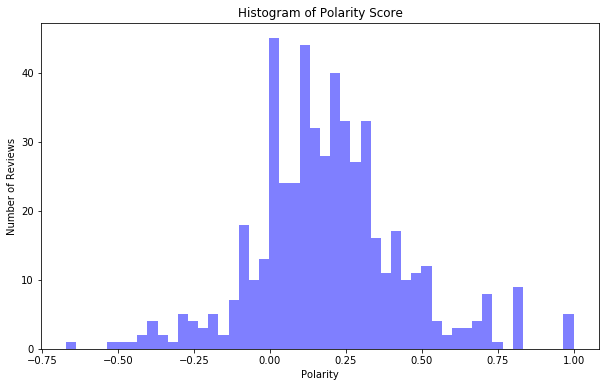

In [131]:
#histogram plot of polarity score
num_bins = 50
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(df2.polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Number of Reviews')
plt.title('Histogram of Polarity Score')
plt.show();

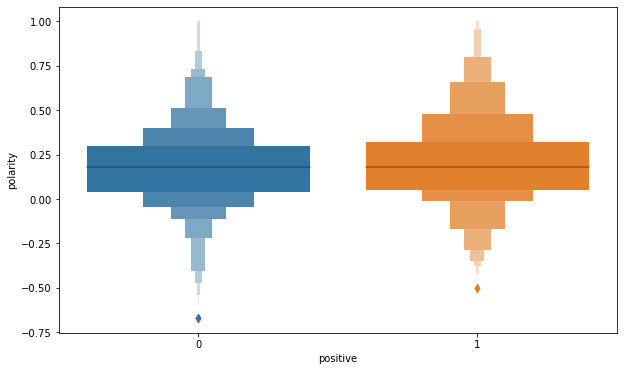

In [132]:
#boxplot based on polarity 1-poitive, 0-negative 
plt.figure(figsize=(10,6))
sns.boxenplot(x='positive', y='polarity', data=df2)
plt.show();

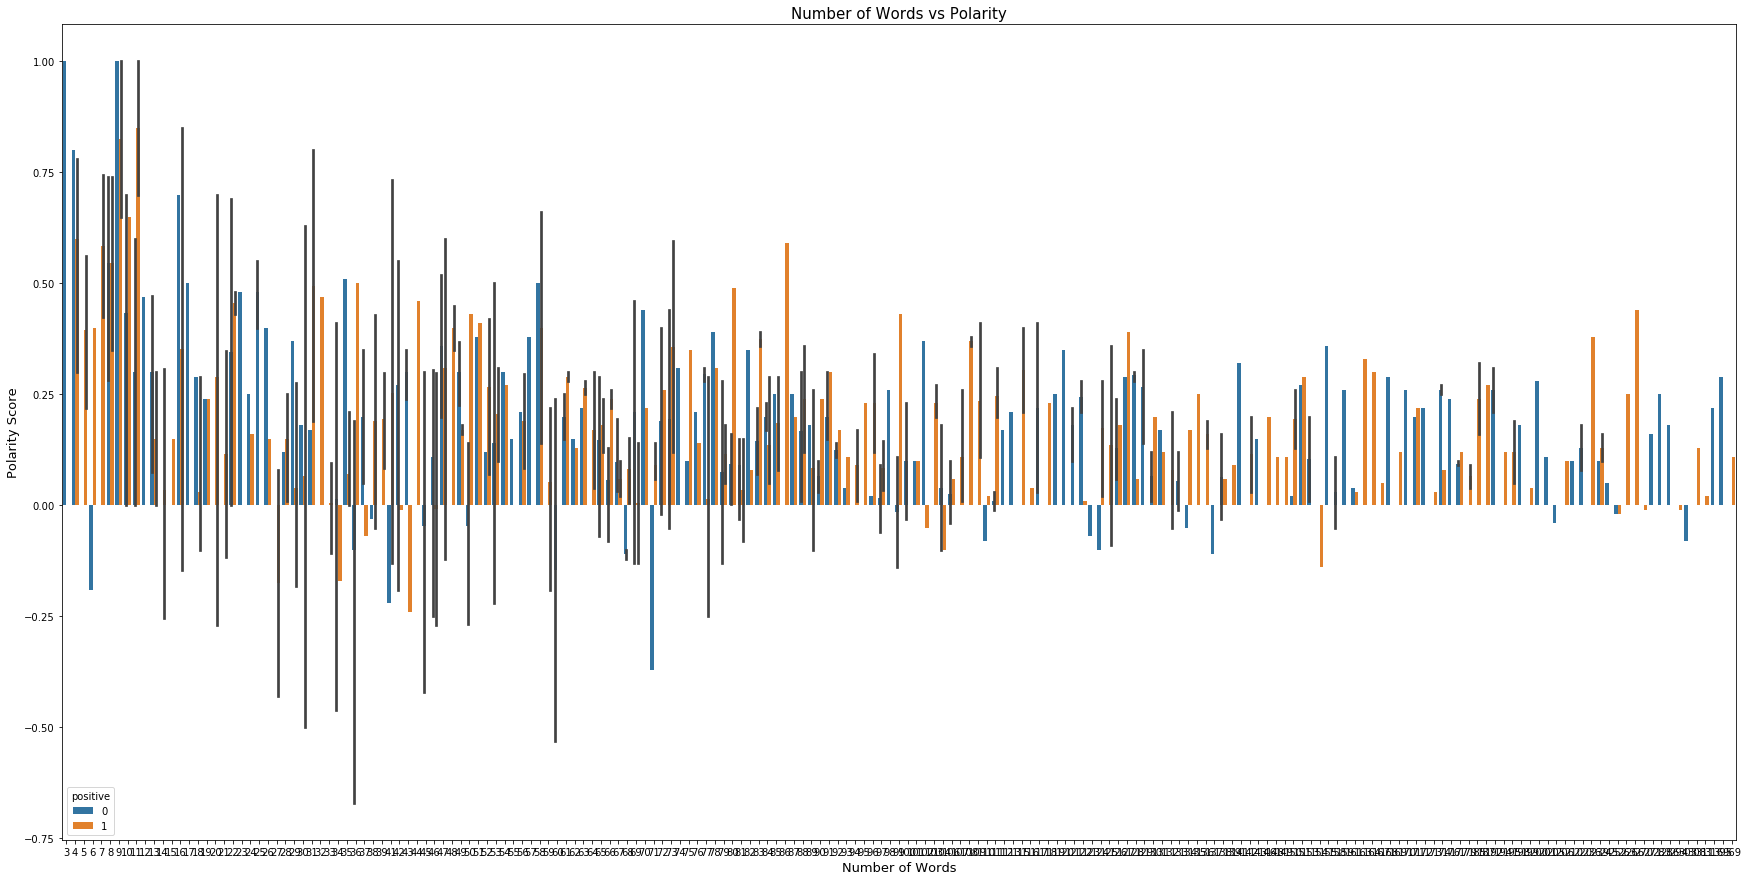

In [133]:
#barplot of word count vs polarity based on hue of positive
plt.figure(figsize=(30,15))
sns.barplot(x='word_count', y='polarity', hue='positive', data=df2)
plt.xlabel('Number of Words', fontsize=13)
plt.ylabel('Polarity Score', fontsize=13)
plt.title('Number of Words vs Polarity', fontsize=15)
plt.show();

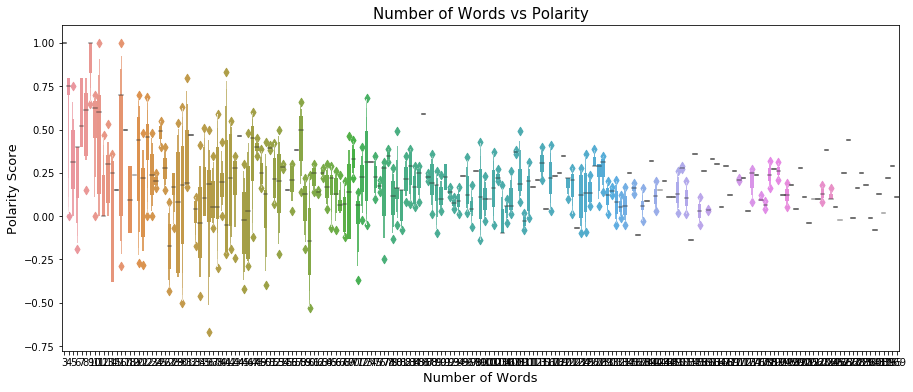

In [134]:
#boxplot of word count vs polarity
plt.figure(figsize=(15,6))
sns.boxenplot(x='word_count', y='polarity', data=df2)
plt.xlabel('Number of Words', fontsize=13)
plt.ylabel('Polarity Score', fontsize=13)
plt.title('Number of Words vs Polarity', fontsize=15)
plt.show();

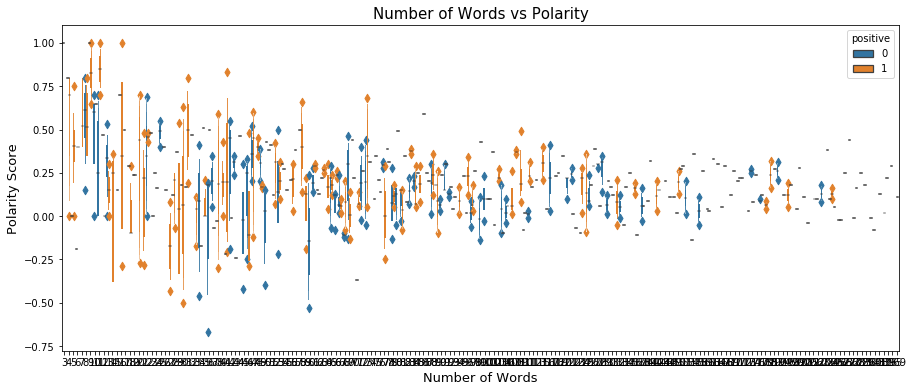

In [135]:
#boxplot of word count vs polarity based on hue of positive
plt.figure(figsize=(15,6))
sns.boxenplot(x='word_count', y='polarity', hue='positive',  linewidth=2.5, data=df2)
plt.xlabel('Number of Words', fontsize=13)
plt.ylabel('Polarity Score', fontsize=13)
plt.title('Number of Words vs Polarity', fontsize=15)
plt.show();

Text(0.5, 1.0, 'Distribution of Subjectivity Score')

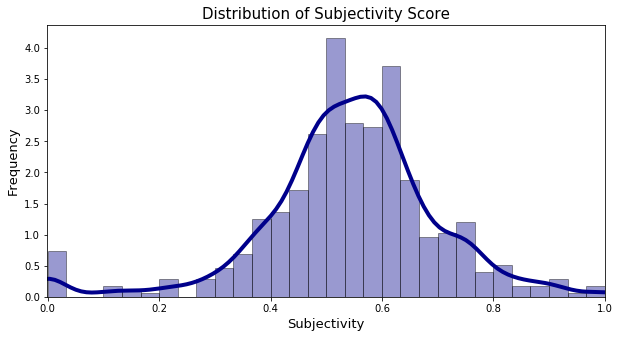

In [136]:
#density plot and histogram of subjectivity
plt.figure(figsize=(10,5))
sns.distplot(df2['subjectivity'], hist=True, kde=True, 
             bins=int(30), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.xlim([-0.001,1.001])
plt.xlabel('Subjectivity', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.title('Distribution of Subjectivity Score', fontsize=15)

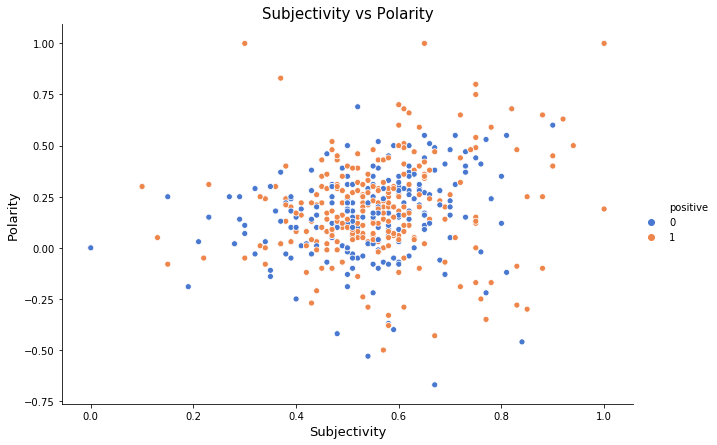

In [137]:
#plot of subjectivity vs polarity based on hue of positive
sns.relplot(x="subjectivity", y="polarity", hue="positive", alpha=1 , palette="muted",
            height=6, aspect= 1.5, data=df2)
plt.xlabel('Subjectivity', fontsize=13)
plt.ylabel('Polarity', fontsize=13)
plt.title('Subjectivity vs Polarity', fontsize=15)
plt.show();

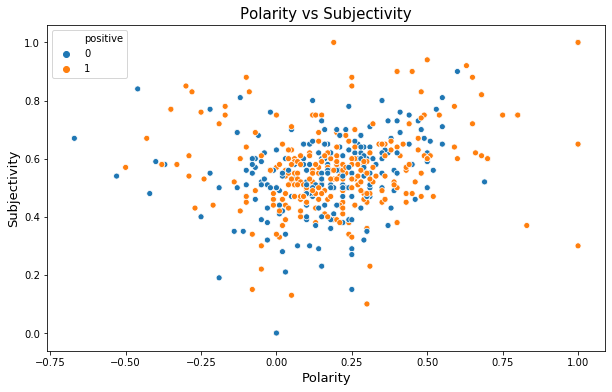

In [138]:
#scatterplot of subjectivity vs polarity based on hue of positive
plt.figure(figsize=(10,6))
sns.scatterplot(x='polarity', y='subjectivity', hue="positive", data=df2)
plt.xlabel('Polarity', fontsize=13)
plt.ylabel('Subjectivity', fontsize=13)
plt.title('Polarity vs Subjectivity', fontsize=15)
plt.show();

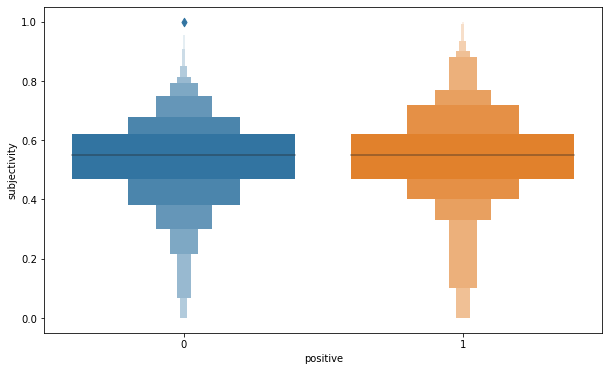

In [139]:
#boxplot of subjectivity vs polarity 
plt.figure(figsize=(10,6))
sns.boxenplot(x='positive', y='subjectivity', data=df2)
plt.show();

In [140]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

In [141]:
comment = df2['clean']
sia = SIA()
results = []

for line in comment:
    pol_score = sia.polarity_scores(line)
    pol_score['comment'] = line
    results.append(pol_score)

In [142]:
from pprint import pprint
pprint(results[:3], width=100)

[{'comment': 'pictures speak intense mold everywhere idea zero carbs mold doesnt look like biltong '
             'always look jerky put gob gross',
  'compound': -0.6007,
  'neg': 0.231,
  'neu': 0.711,
  'pos': 0.058},
 {'comment': 'excited find product local jerkey place used carry biltong stopped recently checked '
             'ingredients current screen shot included saw wheat sugar cant eat wheat due allergy '
             'ive cut cane sugar corn syrup diet try healthier excited teriyake showed amazon soy '
             'used wheat free sugar opened package double checked ingredients included things '
             'werent products description still want try flavors cant make use 14 purchasethe '
             'individual page teriyake lists right ingredients page variety showed picture '
             'misleading',
  'compound': 0.5267,
  'neg': 0.081,
  'neu': 0.785,
  'pos': 0.134},
 {'comment': 'zest garlic package variety pack sits unopened sealed airtight way delivered see '

In [143]:
df3 = pd.DataFrame.from_records(results)
df3.tail()

,neg,neu,pos,compound,comment
521,0.047,0.689,0.264,0.9129,ride bicycle hard time finding lean protein wi...
522,0.000,0.960,0.040,0.1372,prefer whole foods 365 turkey jerky thought wo...
523,0.000,0.702,0.298,0.6249,ordered satisfied however time ordered receive...
524,0.000,0.710,0.290,0.8402,flavor pretty good dog knows get bag comes box...
525,0.000,1.000,0.000,0.0000,purchase


In [144]:
df3['label'] = 0
df3.loc[df3['compound'] >= 0.5267, 'label'] = 1
df3.loc[df3['compound'] <= 0.5267, 'label'] = -1
df3.tail()

,neg,neu,pos,compound,comment,label
521,0.047,0.689,0.264,0.9129,ride bicycle hard time finding lean protein wi...,1
522,0.000,0.960,0.040,0.1372,prefer whole foods 365 turkey jerky thought wo...,-1
523,0.000,0.702,0.298,0.6249,ordered satisfied however time ordered receive...,1
524,0.000,0.710,0.290,0.8402,flavor pretty good dog knows get bag comes box...,1
525,0.000,1.000,0.000,0.0000,purchase,-1


In [145]:
text1 = "".join(review for review in df3[df3.label == 1].comment)

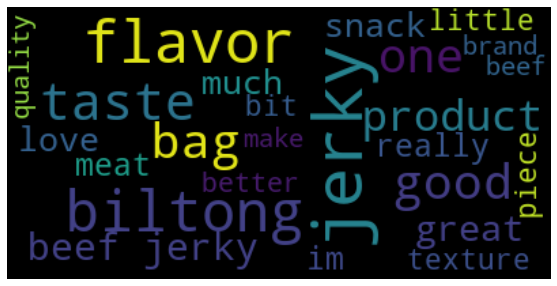

In [146]:
#Wordcloud for positive comments 
wordcloud = WordCloud(max_font_size=50, max_words=25, background_color="black").generate(text1)
fig = plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [147]:
text2 = "".join(review for review in df3[df3.label == -1].comment)

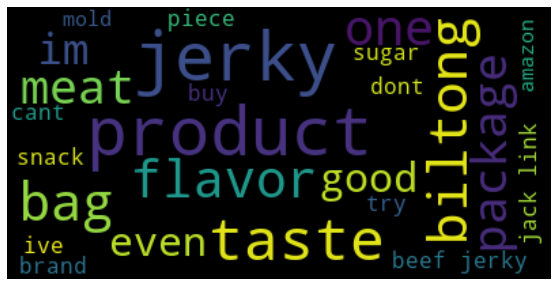

In [148]:
#Wordcloud for negative comments 
wordcloud = WordCloud(max_font_size=50, max_words=25, background_color="black").generate(text2)
fig = plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()